In [109]:
# Import necessary packages and files
import mysql.connector
import requests
import config
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [72]:
db_name = 'colleges'
cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = "colleges"
)
cursor = cnx.cursor()

In [73]:
cursor.execute(
"""
SELECT
    *
FROM 
    colleges.colleges_inner
;
"""
)
colleges_df = cursor.fetchall()
cursor.close()

True

In [74]:
colleges_df = pd.DataFrame(colleges_df)

In [75]:
colleges_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Abilene Christian University,1,3670,Moderately difficult,51.0,4.0,558.0,566.0,49792,NaN,...,NaN,10350,71,26051,None,"Private School, Religious, For Sports Fans",49700,90900,53.0,9.0
1,Adams State University,0,1991,Moderately difficult,99.0,3.0,480.0,495.0,24545.40,22893.0,...,20456.0,8782,70,14726,22822,State School,44400,81400,56.0,3.0
2,Adelphi University,1,5391,Moderately difficult,74.0,4.0,590.0,586.0,58710,NaN,...,NaN,16030,44,22900,34980,"Private School, Research University",53700,96400,50.0,6.0
3,Adrian College,1,1647,Moderately difficult,56.0,3.0,NaN,NaN,None,NaN,...,NaN,None,77,27013,27741,"Private School, Religious",42400,78000,58.0,12.0
4,Agnes Scott College,1,996,Moderately difficult,70.0,4.0,580.0,627.0,57505,NaN,...,NaN,12670,84,37669,30850,"Liberal Arts School, Private School, Religious...",46000,83600,57.0,26.0


In [76]:
colleges_df.columns = ['college','private','total_undergrad',
                       'entrance_difficulty','admission_rate','avg_gpa',
                      'SAT_math_avg','SAT_EBRW_avg','total_cost','in_cost','out_cost',
                      'tuition', 'in_tuition','out_tuition','room_and_board','pcent_avg_need_met',
                      'avg_f_award','avg_indebted','uni_type','early_car_pay','mid_car_pay',
                      'high_meaning','stem_deg']

In [77]:
colleges_df.head()

,college,private,total_undergrad,entrance_difficulty,admission_rate,avg_gpa,SAT_math_avg,SAT_EBRW_avg,total_cost,in_cost,...,out_tuition,room_and_board,pcent_avg_need_met,avg_f_award,avg_indebted,uni_type,early_car_pay,mid_car_pay,high_meaning,stem_deg
0,Abilene Christian University,1,3670,Moderately difficult,51.0,4.0,558.0,566.0,49792,NaN,...,NaN,10350,71,26051,None,"Private School, Religious, For Sports Fans",49700,90900,53.0,9.0
1,Adams State University,0,1991,Moderately difficult,99.0,3.0,480.0,495.0,24545.40,22893.0,...,20456.0,8782,70,14726,22822,State School,44400,81400,56.0,3.0
2,Adelphi University,1,5391,Moderately difficult,74.0,4.0,590.0,586.0,58710,NaN,...,NaN,16030,44,22900,34980,"Private School, Research University",53700,96400,50.0,6.0
3,Adrian College,1,1647,Moderately difficult,56.0,3.0,NaN,NaN,None,NaN,...,NaN,None,77,27013,27741,"Private School, Religious",42400,78000,58.0,12.0
4,Agnes Scott College,1,996,Moderately difficult,70.0,4.0,580.0,627.0,57505,NaN,...,NaN,12670,84,37669,30850,"Liberal Arts School, Private School, Religious...",46000,83600,57.0,26.0


<Figure size 432x288 with 0 Axes>

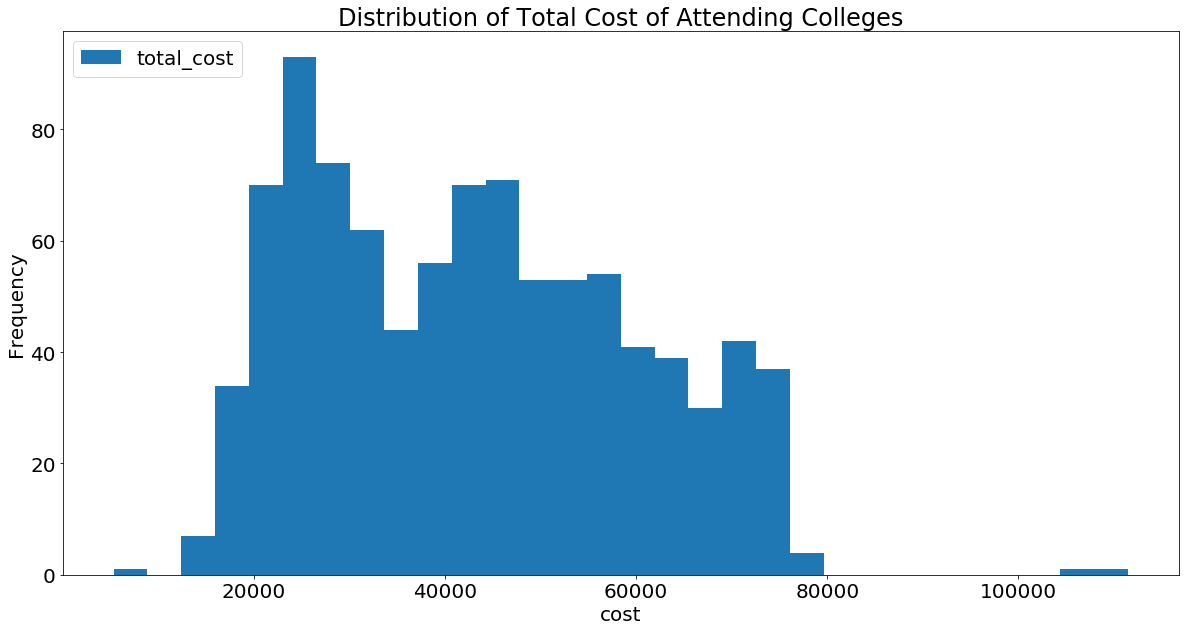

In [37]:
x = range(100)
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
costs = colleges_df['total_cost']

ax1.hist(x=[float(cost) for cost in costs if cost != None ], label='total_cost', bins=30)

plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('cost')
plt.title('Distribution of Total Cost of Attending Colleges')
plt.rc('font', size=20);
plt.show()

<Figure size 432x288 with 0 Axes>

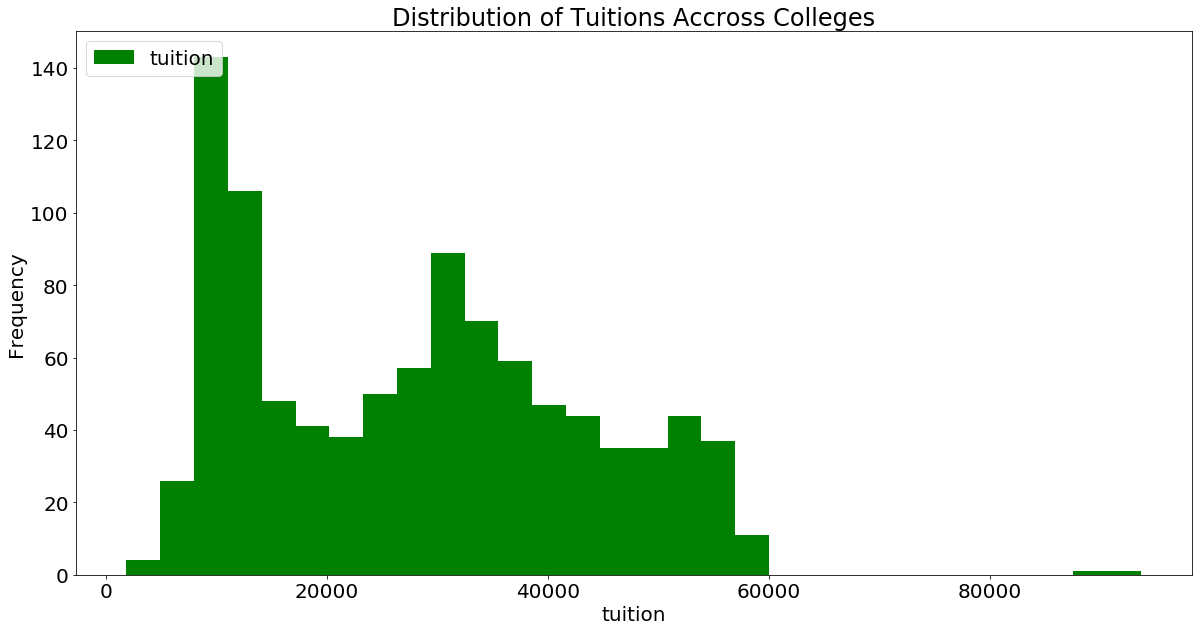

In [38]:
x = range(100)
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
tuitions = colleges_df['tuition']

ax1.hist(x=[float(tuition) for tuition in tuitions if tuition != None ], color='green', label='tuition', bins=30)

plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('tuition')
plt.title('Distribution of Tuitions Accross Colleges')
plt.rc('font', size=20);
plt.show()

<Figure size 432x288 with 0 Axes>

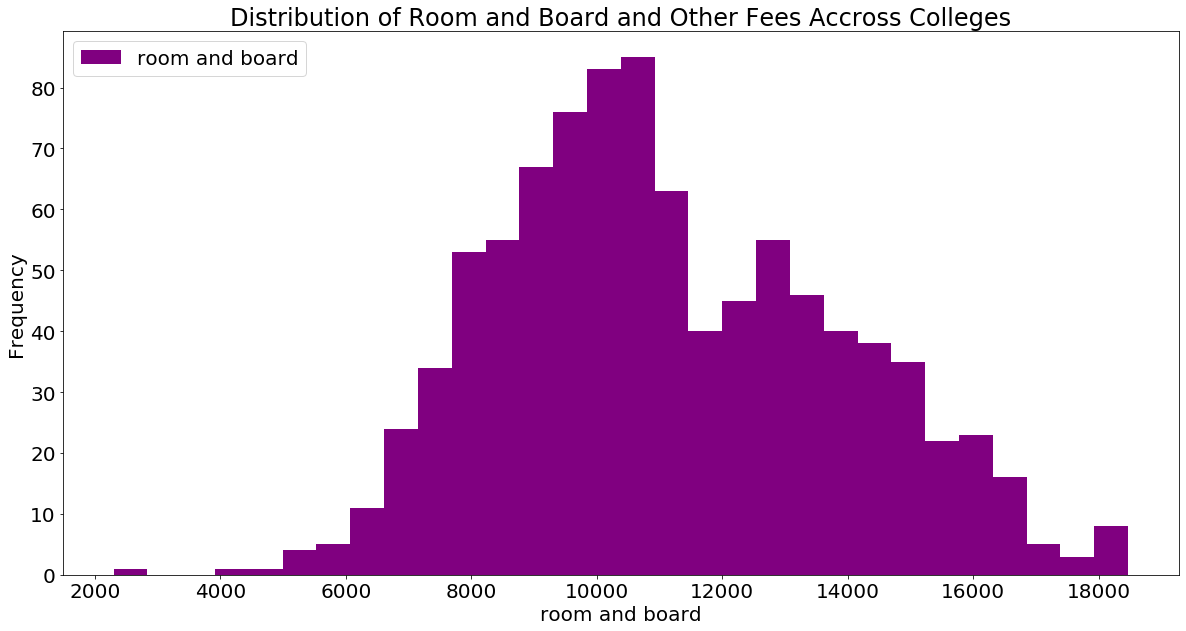

In [39]:
x = range(100)
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
other_fees = colleges_df['room_and_board']

ax1.hist(x=[float(fee) for fee in other_fees if fee != None ], color='purple', label='room and board', bins=30)

plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('room and board')
plt.title('Distribution of Room and Board and Other Fees Accross Colleges')
plt.rc('font', size=20);
plt.show()

<Figure size 432x288 with 0 Axes>

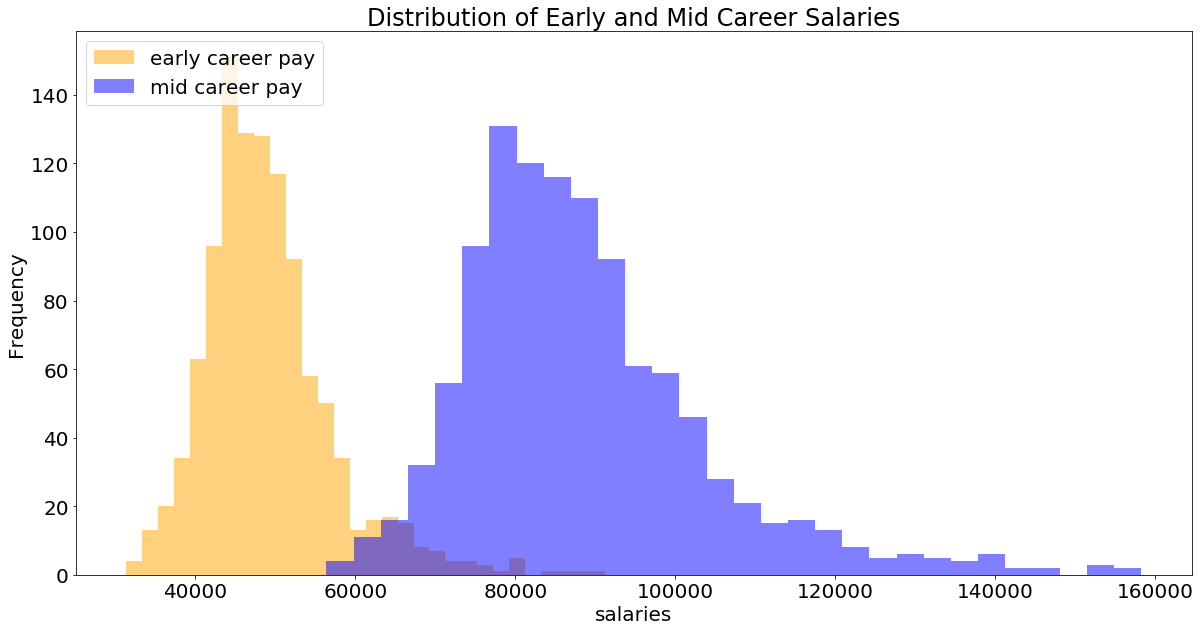

In [40]:
x = range(100)
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
early_cars = colleges_df['early_car_pay']
mid_cars = colleges_df['mid_car_pay']

ax1.hist(x=[float(car) for car in early_cars if car != None ], color='orange', alpha=0.5, label='early career pay', bins=30)
ax1.hist(x=[float(car) for car in mid_cars if car != None ], color='blue', alpha=0.5, label='mid career pay', bins=30)

plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('salaries')
plt.title('Distribution of Early and Mid Career Salaries')
plt.rc('font', size=20);
plt.show()

<Figure size 432x288 with 0 Axes>

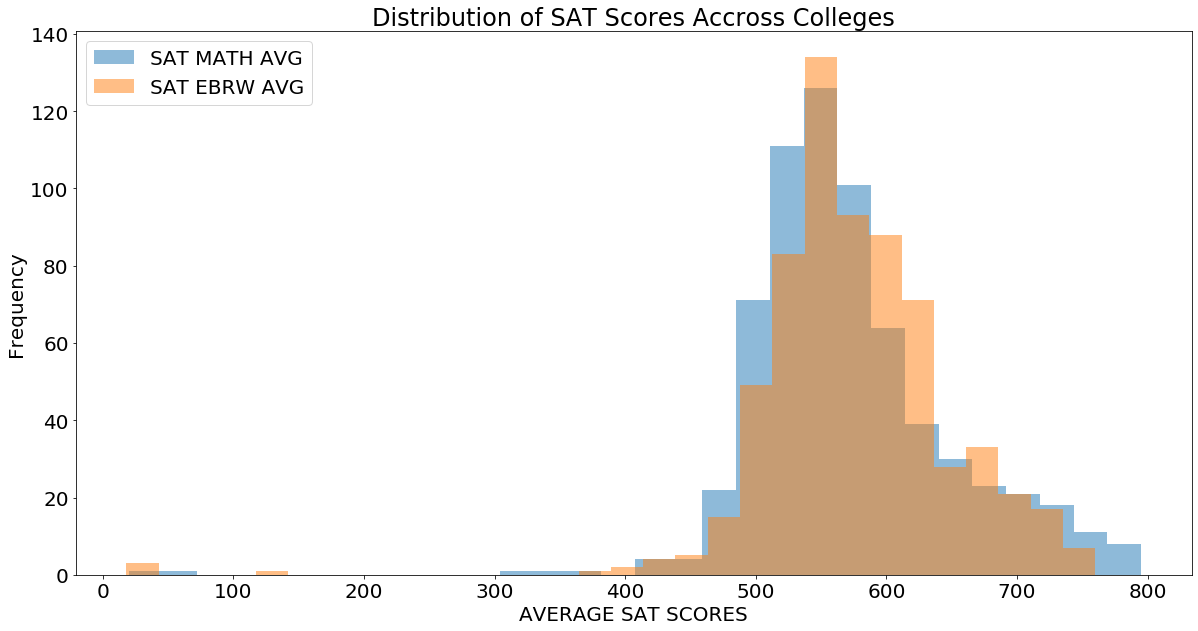

In [89]:
x = range(100)
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
SAT_math = colleges_df['SAT_math_avg']
SAT_EBRW = colleges_df['SAT_EBRW_avg']

ax1.hist(x=[float(score) for score in SAT_math if score != None ], label='SAT MATH AVG', alpha = 0.5, bins=30)
ax1.hist(x=[float(score) for score in SAT_EBRW if score != None ], label='SAT EBRW AVG', alpha = 0.5, bins=30)

plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('AVERAGE SAT SCORES')
plt.title('Distribution of SAT Scores Accross Colleges')
plt.rc('font', size=20);
plt.show()

In [67]:
cursor=cnx.cursor()

In [78]:
cursor=cnx.cursor()
cursor.execute(
"""
SELECT
    college,
    total_cost,
    tuition,
    room_and_board,
    early_car_pay,
    mid_car_pay 
FROM 
    colleges.colleges_inner
WHERE
    college != 'None' AND
    total_cost != 'None' AND 
    tuition != 'None' AND
    room_and_board != 'None' AND
    early_car_pay != 'None' AND
    mid_car_pay  != 'None';
"""
)
c_and_s = cursor.fetchall()

c_and_s_df = pd.DataFrame(c_and_s)

In [83]:
c_and_s_df.columns = ['college','total_cost','tuition','room_and_board','early_car_pay','mid_car_pay']
c_and_s_df.head()

,college,total_cost,tuition,room_and_board,early_car_pay,mid_car_pay
0,Abilene Christian University,49792,34850,10350,49700,90900
1,Adams State University,24545.40,11092.40,8782,44400,81400
2,Adelphi University,58710,38660,16030,53700,96400
3,Agnes Scott College,57505,42690,12670,46000,83600
4,Alabama State University,23509.20,12317.20,6050,39800,71500


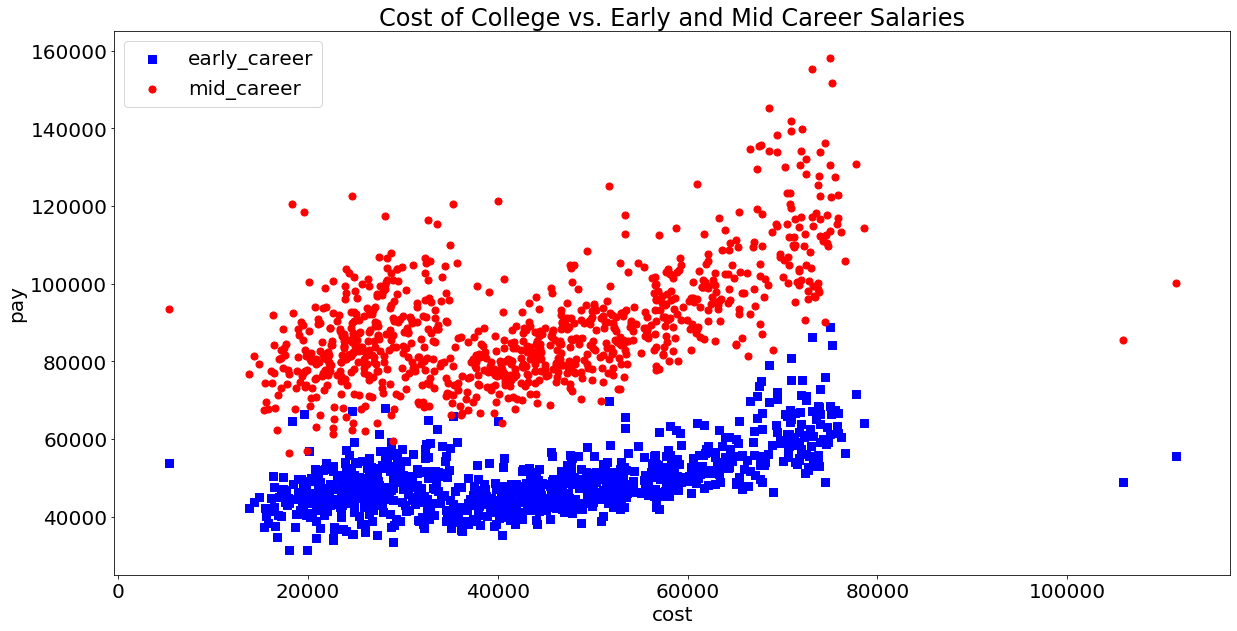

In [85]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

costs = [float(cost) for cost in c_and_s_df['total_cost']]
early_pay = [float(car) for car in c_and_s_df['early_car_pay']]
mid_pay = [float(car) for car in c_and_s_df['mid_car_pay']]


ax1.scatter(x=costs, y=early_pay, s=50, c='b', marker="s", label='early_career')
ax1.scatter(x=costs,y=mid_pay, s=50, c='r', marker="o", label='mid_career')
plt.legend(loc='upper left')
plt.ylabel('pay')
plt.xlabel('cost')
plt.title('Cost of College vs. Early and Mid Career Salaries')
plt.rc('font', size=15)  
;
plt.show()

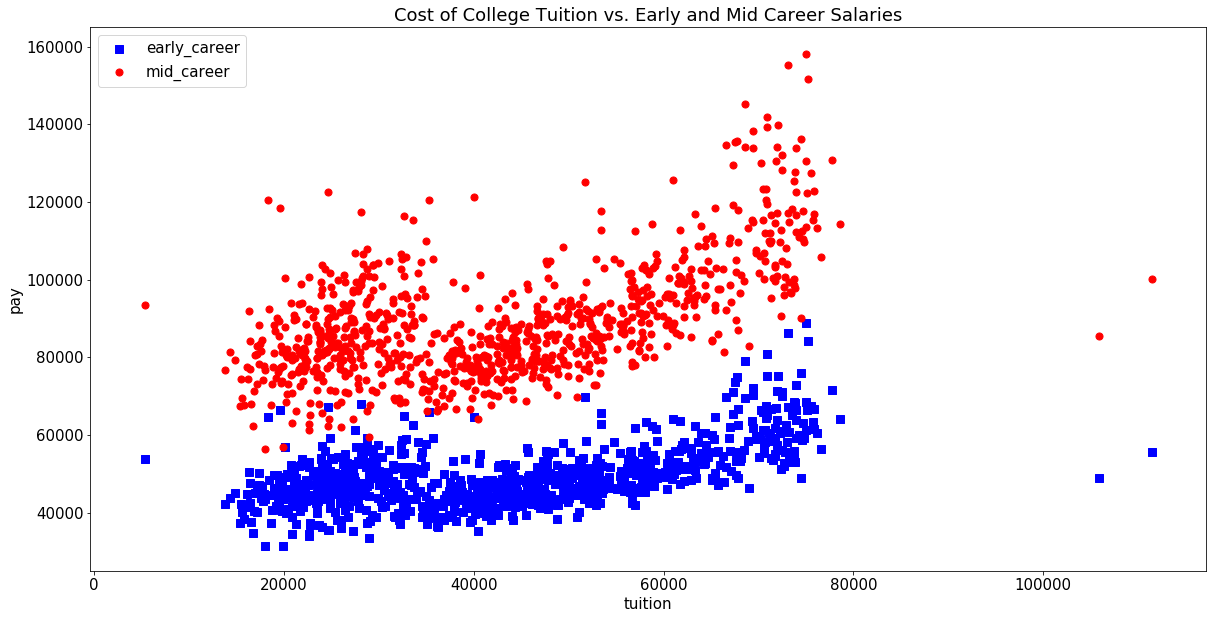

In [86]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

tuition = [float(cost) for cost in c_and_s_df['tuition']]
early_pay = [float(car) for car in c_and_s_df['early_car_pay']]
mid_pay = [float(car) for car in c_and_s_df['mid_car_pay']]


ax1.scatter(x=costs, y=early_pay, s=50, c='b', marker="s", label='early_career')
ax1.scatter(x=costs,y=mid_pay, s=50, c='r', marker="o", label='mid_career')
plt.legend(loc='upper left')
plt.ylabel('pay')
plt.xlabel('tuition')
plt.title('Cost of College Tuition vs. Early and Mid Career Salaries')
plt.rc('font', size=15)  
;
plt.show()

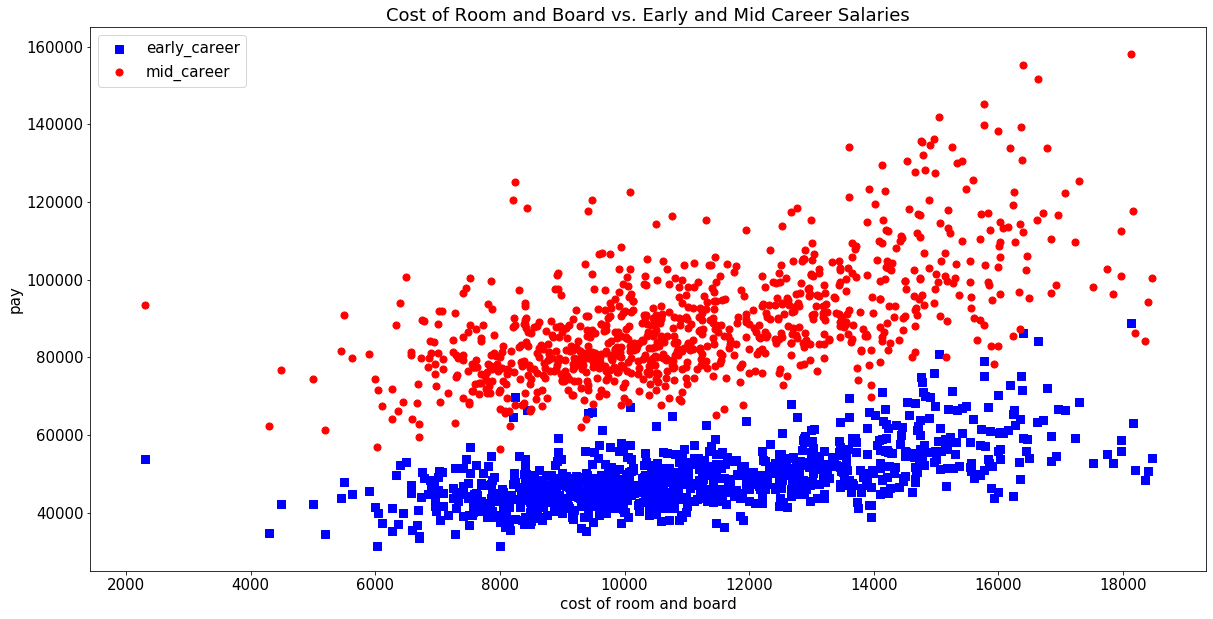

In [87]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

costs = [float(cost) for cost in c_and_s_df['room_and_board']]
early_pay = [float(car) for car in c_and_s_df['early_car_pay']]
mid_pay = [float(car) for car in c_and_s_df['mid_car_pay']]


ax1.scatter(x=costs, y=early_pay, s=50, c='b', marker="s", label='early_career')
ax1.scatter(x=costs,y=mid_pay, s=50, c='r', marker="o", label='mid_career')
plt.legend(loc='upper left')
plt.ylabel('pay')
plt.xlabel('cost of room and board')
plt.title('Cost of Room and Board vs. Early and Mid Career Salaries')
plt.rc('font', size=15)  
;
plt.show()

In [91]:
cursor=cnx.cursor()
cursor.execute(
"""
SELECT
    college,
    SAT_math_avg,
    SAT_EBRW_avg,
    total_cost,
    tuition,
    room_and_board,
    early_car_pay,
    mid_car_pay 
FROM 
    colleges.colleges_inner
WHERE
    college != 'None' AND
    SAT_math_avg != 'None' AND
    SAT_EBRW_avg != 'None' AND
    total_cost != 'None' AND 
    tuition != 'None' AND
    room_and_board != 'None' AND
    early_car_pay != 'None' AND
    mid_car_pay  != 'None';
"""
)
SAT_COST_PAY = cursor.fetchall()
cursor.close()
SAT_COST_PAY_df = pd.DataFrame(SAT_COST_PAY)

In [92]:
SAT_COST_PAY_df.columns = ['college',
    'SAT_math_avg',
    'SAT_EBRW_avg',
    'total_cost',
    'tuition',
    'room_and_board',
    'early_car_pay',
    'mid_car_pay' ]

In [93]:
SAT_COST_PAY_df.head()

,college,SAT_math_avg,SAT_EBRW_avg,total_cost,tuition,room_and_board,early_car_pay,mid_car_pay
0,Abilene Christian University,558,566,49792,34850,10350,49700,90900
1,Adams State University,480,495,24545.40,11092.40,8782,44400,81400
2,Adelphi University,590,586,58710,38660,16030,53700,96400
3,Agnes Scott College,580,627,57505,42690,12670,46000,83600
4,Alabama State University,465,480,23509.20,12317.20,6050,39800,71500


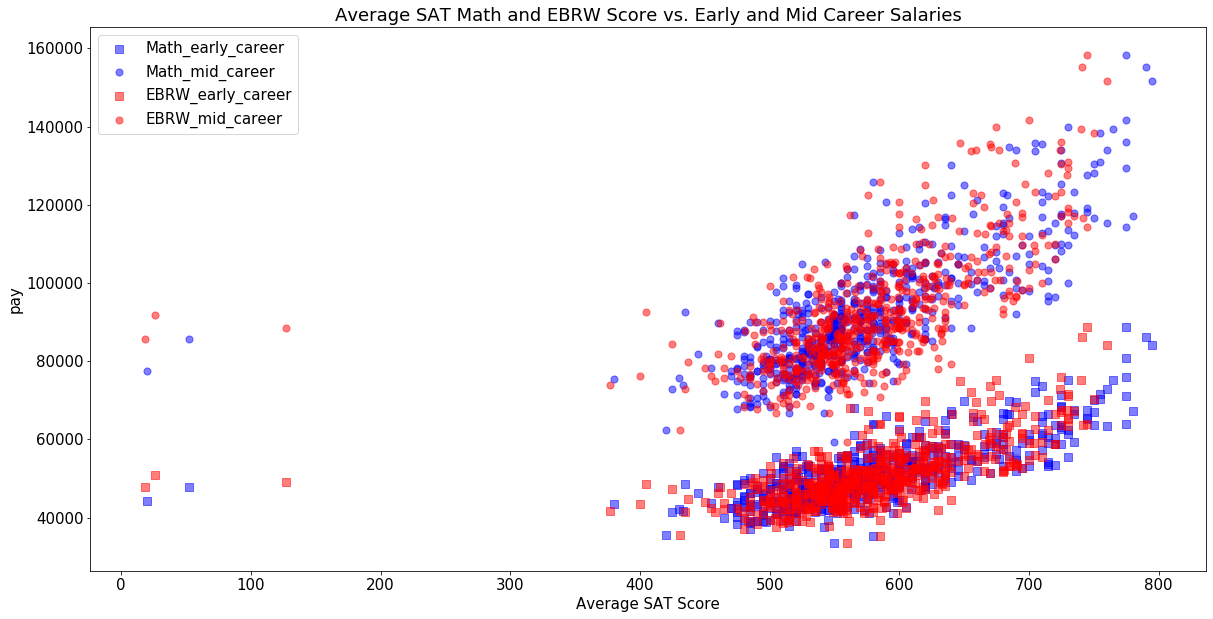

In [102]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

math = [float(score) for score in SAT_COST_PAY_df['SAT_math_avg']]
EBRW = [float(score) for score in SAT_COST_PAY_df['SAT_EBRW_avg']]
early_pay = [float(car) for car in SAT_COST_PAY_df['early_car_pay']]
mid_pay = [float(car) for car in SAT_COST_PAY_df['mid_car_pay']]


ax1.scatter(x=math, y=early_pay, s=50, c='b', marker="s", label='Math_early_career', alpha = 0.5)
ax1.scatter(x=math,y=mid_pay, s=50, c='b', marker="o", label='Math_mid_career', alpha = 0.5)
ax1.scatter(x=EBRW, y=early_pay, s=50, c='r', marker="s", label='EBRW_early_career', alpha = 0.5)
ax1.scatter(x=EBRW,y=mid_pay, s=50, c='r', marker="o", label='EBRW_mid_career', alpha = 0.5)
plt.legend(loc='upper left')
plt.ylabel('pay')
plt.xlabel('Average SAT Score')
plt.title('Average SAT Math and EBRW Score vs. Early and Mid Career Salaries')
plt.rc('font', size=15)  
;
plt.show()

In [103]:
cursor=cnx.cursor()
cursor.execute(
"""
SELECT
    college,
    total_cost,
    tuition,
    room_and_board,
    early_car_pay,
    mid_car_pay,
    avg_indebted,
    stem_deg
FROM 
    colleges.colleges_inner
WHERE
    college != 'None' AND
    total_cost != 'None' AND 
    tuition != 'None' AND
    room_and_board != 'None' AND
    early_car_pay != 'None' AND
    mid_car_pay  != 'None' AND
    avg_indebted != 'None' AND
    stem_deg  != 'None';
"""
)
DEBT_STEM_COST_PAY = cursor.fetchall()
cursor.close()
DEBT_STEM_COST_PAY_df = pd.DataFrame(DEBT_STEM_COST_PAY)

In [104]:
DEBT_STEM_COST_PAY_df.columns = ['college',
    'total_cost',
    'tuition',
    'room_and_board',
    'early_car_pay',
    'mid_car_pay',
    'avg_indebted',
    'stem_deg']

In [105]:
DEBT_STEM_COST_PAY_df.head()

,college,total_cost,tuition,room_and_board,early_car_pay,mid_car_pay,avg_indebted,stem_deg
0,Adams State University,24545.40,11092.40,8782,44400,81400,22822,3.0
1,Adelphi University,58710,38660,16030,53700,96400,34980,6.0
2,Agnes Scott College,57505,42690,12670,46000,83600,30850,26.0
3,Alabama State University,23509.20,12317.20,6050,39800,71500,3376,16.0
4,Albertus Magnus College,48892,32060,13200,49700,85900,36908,2.0


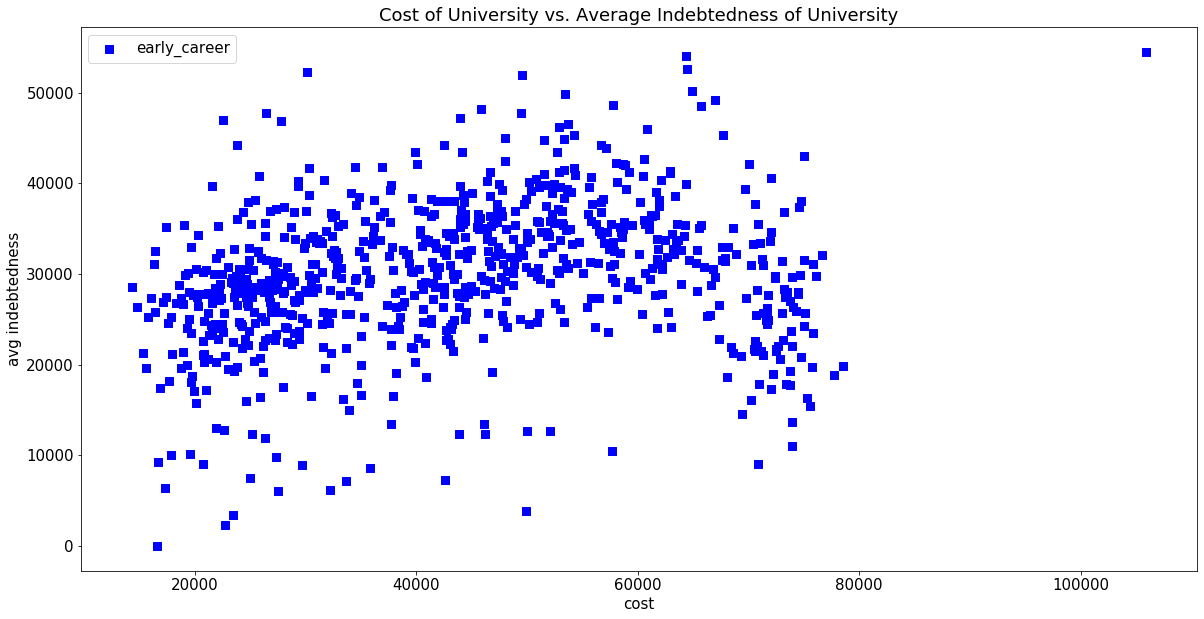

In [106]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

costs = [float(cost) for cost in DEBT_STEM_COST_PAY_df['total_cost']]
indebted = [float(car) for car in DEBT_STEM_COST_PAY_df['avg_indebted']]



ax1.scatter(x=costs, y=indebted, s=50, c='b', marker="s", label='early_career')

plt.legend(loc='upper left')
plt.ylabel('avg indebtedness')
plt.xlabel('cost')
plt.title('Cost of University vs. Average Indebtedness of University')
plt.rc('font', size=15)  
;
plt.show()

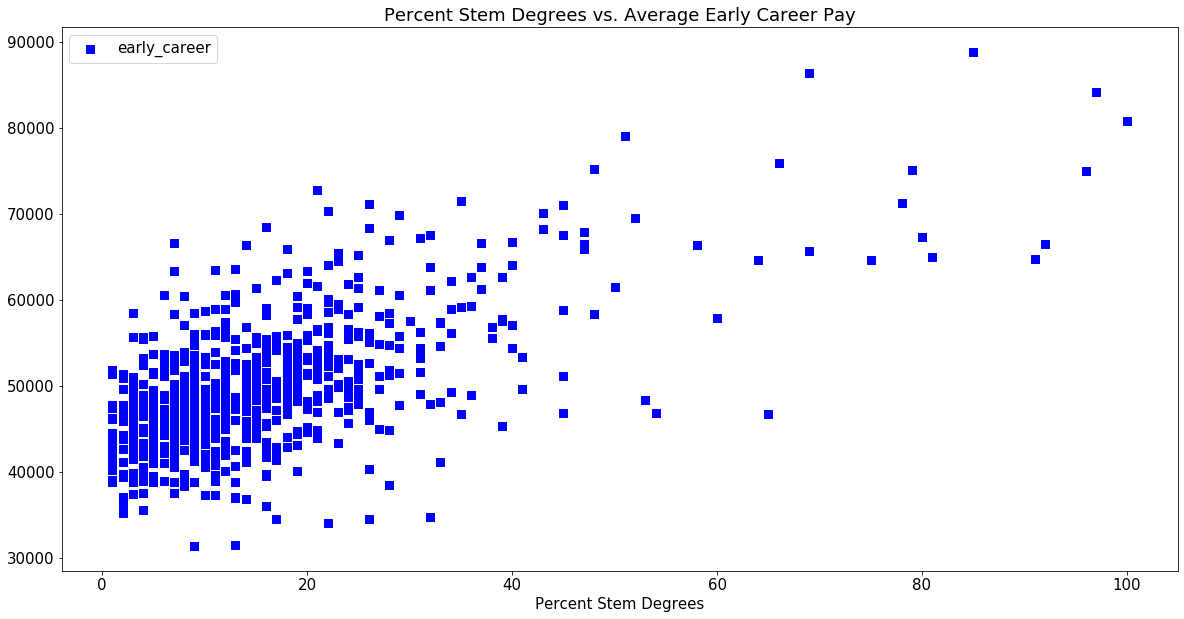

In [108]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

pay = [float(pay) for pay in DEBT_STEM_COST_PAY_df['early_car_pay']]
stem = [float(stem) for stem in DEBT_STEM_COST_PAY_df['stem_deg']]



ax1.scatter(x=stem, y=pay, s=50, c='b', marker="s", label='early_career')

plt.legend(loc='upper left')
plt.ylabel('')
plt.xlabel('Percent Stem Degrees')
plt.title('Percent Stem Degrees vs. Average Early Career Pay')
plt.rc('font', size=15)  
;
plt.show()

In [119]:
DEBT_STEM_COST_PAY_df['early_car_pay'] = [float(pay) for pay in DEBT_STEM_COST_PAY_df['early_car_pay']]
DEBT_STEM_COST_PAY_df['stem_deg'] = [float(stem) for stem in DEBT_STEM_COST_PAY_df['stem_deg']]

results = smf.ols('early_car_pay ~ stem_deg', data=DEBT_STEM_COST_PAY_df).fit()

In [125]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          early_car_pay   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     580.6
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.08e-96
Time:                        18:16:18   Log-Likelihood:                -8017.1
No. Observations:                 795   AIC:                         1.604e+04
Df Residuals:                     793   BIC:                         1.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.42e+04    308.350    143.348      0.0

Text(0.5, 1, 'Percent of Stem Degrees vs. Average Early Career Pay')

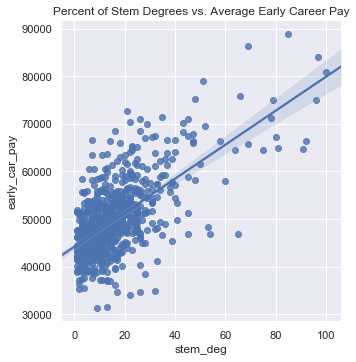

In [202]:
sns.lmplot('stem_deg','early_car_pay',data=DEBT_STEM_COST_PAY_df)
sns.set(rc={'figure.figsize':(70,70)})
ax = plt.gca()
ax.set_title("Percent of Stem Degrees vs. Average Early Career Pay")

In [123]:
t = 356.7546/14.805
F_statistic = t**2
#pvalue is same as probability of F-statistic

580.6605749614286

In [200]:
c_and_s_df['total_cost'] = [float(cost) for cost in c_and_s_df['total_cost']]
c_and_s_df['early_car_pay'] = [float(car) for car in c_and_s_df['early_car_pay']]
results_1 = smf.ols('early_car_pay ~ total_cost', data=c_and_s_df).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          early_car_pay   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     400.4
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           2.84e-74
Time:                        10:07:41   Log-Likelihood:                -9420.0
No. Observations:                 925   AIC:                         1.884e+04
Df Residuals:                     923   BIC:                         1.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.857e+04    576.328     66.924      0.000    3.74e+04    3.97e+04
total_cost     0.2492      0.012     20.011      0.000       0.225       0.274
==============================================================================
Omnibus:                      147.811   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.617
Skew:                           0.964   Prob(JB):                     3.84e-60
Kurtosis:                       4.840   Cond. No.                     1.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#coefficient = mean change...
#the likelihood of getting a mean change of this size is pvalue
# is it substantively significant? look at effect size

Text(0.5, 1, 'Total Cost of US Colleges vs. Average Early Career Pay')

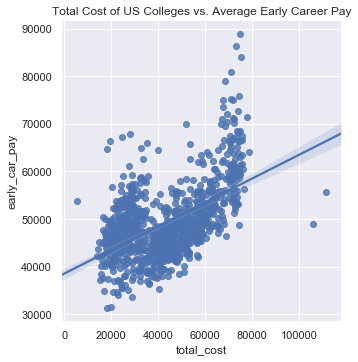

In [134]:
sns.lmplot('total_cost','early_car_pay',data=c_and_s_df)
sns.set(rc={'figure.figsize':(50,15)})
ax = plt.gca()
ax.set_title("Total Cost of US Colleges vs. Average Early Career Pay")


In [138]:
# The power of a statistical test is defined as the probability of rejecting the null hypothesis, 
# given that it is indeed false. As with any probability, the power of a statistical test, 
# therefore, ranges from 0 to 1, with 1 being a perfect test that guarantees rejecting the 
# null hypothesis when it is indeed false.

# Intrinsically, this is related to  𝛽 , the probability of type II errors. When designing a statistical test, 
# a researcher will typically determine an acceptable  𝛼 , such as .05, the probability of type I errors. 
# (Recall that type I errors are when the null-hypothesis is rejected when actually true.) 
# From this given  𝛼  value, an optimal threshold for rejecting the null-hypothesis can be determined. That is, for a 
# given  𝛼  value, you can calculate a threshold that maximizes the power of the test. For any given  𝛼 ,  𝑝𝑜𝑤𝑒𝑟=1−𝛽 .

In [155]:
#power: 


In [149]:
DEBT_STEM_COST_PAY_df['early_car_pay'] = [float(pay) for pay in DEBT_STEM_COST_PAY_df['early_car_pay']]
DEBT_STEM_COST_PAY_df['avg_indebted'] = [float(stem) for stem in DEBT_STEM_COST_PAY_df['avg_indebted']]

results = smf.ols('early_car_pay ~ avg_indebted', data=DEBT_STEM_COST_PAY_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          early_car_pay   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.208
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.272
Time:                        19:46:33   Log-Likelihood:                -8234.9
No. Observations:                 795   AIC:                         1.647e+04
Df Residuals:                     793   BIC:                         1.648e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.86e+04   1065.638     45.606      0.000    4.65e+04    5.07e+04
avg_indebted     0.0379      0.034      1.099      0.272      -0.030       0.106
==============================================================================
Omnibus:                      193.315   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.816
Skew:                           1.268   Prob(JB):                    7.85e-104
Kurtosis:                       5.812   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
cursor=cnx.cursor()
cursor.execute(
"""
SELECT
    college,
    entrance_difficulty
    total_cost,
    tuition,
    room_and_board,
    early_car_pay,
    mid_car_pay 
FROM 
    colleges.colleges_inner
WHERE
    college != 'None' AND
    entrance_difficulty != 'None' AND
    total_cost != 'None' AND 
    tuition != 'None' AND
    room_and_board != 'None' AND
    early_car_pay != 'None' AND
    mid_car_pay  != 'None';
"""
)
difficulty = cursor.fetchall()
cursor.close()
difficulty_df = pd.DataFrame(difficulty)

In [142]:
difficulty_df.columns = ['college',
                        'entrance_difficutly'
                        'total_cost',
                        'tuition',
                        'room_and_board',
                        'early_car_pay',
                        'mid_car_pay',]

In [157]:
difficulty_df.head()

,college,entrance_difficutlytotal_cost,tuition,room_and_board,early_car_pay,mid_car_pay
0,Abilene Christian University,Moderately difficult,34850,10350,49700,90900
1,Adams State University,Moderately difficult,11092.40,8782,44400,81400
2,Adelphi University,Moderately difficult,38660,16030,53700,96400
3,Agnes Scott College,Moderately difficult,42690,12670,46000,83600
4,Alabama State University,Minimally difficult,12317.20,6050,39800,71500


In [160]:
DEBT_STEM_COST_PAY_df['early_car_pay'] = [float(pay) for pay in DEBT_STEM_COST_PAY_df['early_car_pay']]
DEBT_STEM_COST_PAY_df['room_and_board'] = [float(stem) for stem in DEBT_STEM_COST_PAY_df['room_and_board']]

results = smf.ols('early_car_pay ~ room_and_board', data=DEBT_STEM_COST_PAY_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          early_car_pay   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     505.1
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           6.15e-87
Time:                        19:50:58   Log-Likelihood:                -8039.6
No. Observations:                 795   AIC:                         1.608e+04
Df Residuals:                     793   BIC:                         1.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.946e+04    926.699     31.786      0.000    2.76e+04    3.13e+04
room_and_board     1.8059      0.080     22.475      0.000       1.648       1.964
==============================================================================
Omnibus:                      135.857   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.200
Skew:                           0.963   Prob(JB):                     1.94e-62
Kurtosis:                       5.207   Cond. No.                     5.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sns.lmplot('room_and_board','early_car_pay',data=c_and_s_df)
sns.set(rc={'figure.figsize':(50,15)})
ax = plt.gca()
ax.set_title("Room and Board Cost of US Colleges vs. Average Early Career Pay")


In [196]:
SAT_COST_PAY_df['early_car_pay'] = [float(pay) for pay in SAT_COST_PAY_df['early_car_pay']]
SAT_COST_PAY_df['SAT_math_avg'] = [float(score) for score in SAT_COST_PAY_df['SAT_math_avg']]
 
results = smf.ols('early_car_pay ~ SAT_math_avg', data=SAT_COST_PAY_df).fit()
results.summary()
#no correlation between the two variables, correlation = 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          early_car_pay   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     785.1
Date:                Fri, 15 Nov 2019   Prob (F-statistic):          6.67e-112
Time:                        09:58:10   Log-Likelihood:                -6138.6
No. Observations:                 616   AIC:                         1.228e+04
Df Residuals:                     614   BIC:                         1.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7550.5559   1557.899      4.847      0.000    4491.098    1.06e+04
SAT_math_avg    75.3195      2.688     28.020      0.000      70.041      80.598
==============================================================================
Omnibus:                      250.673   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1911.274
Skew:                           1.614   Prob(JB):                         0.00
Kurtosis:                      11.003   Cond. No.                     4.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1, 'Average SAT Math Score for Colleges vs. Average Early Career Pay')

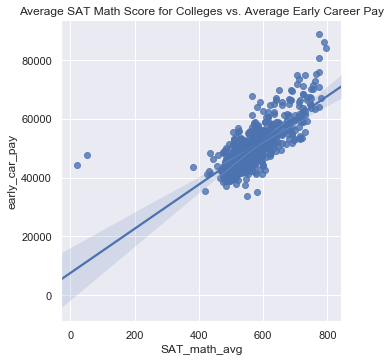

In [205]:
sns.lmplot('SAT_math_avg','early_car_pay',data= SAT_COST_PAY_df)
sns.set(rc={'figure.figsize':(50,15)})
ax = plt.gca()
ax.set_title("Average SAT Math Score for Colleges vs. Average Early Career Pay")

In [195]:
SAT_COST_PAY_df['total_cost']=[float(cost) for cost in SAT_COST_PAY_df['total_cost']]
SAT_COST_PAY_df['SAT_math_avg']=[float(sat) for sat in SAT_COST_PAY_df['SAT_math_avg']]
SAT_COST_PAY_df['early_car_pay']=[float(pay) for pay in SAT_COST_PAY_df['early_car_pay']]
SAT_COST_PAY_df[['SAT_math_avg', 'total_cost','early_car_pay']]

SAT_COST_PAY_df['early_car_pay'] = [float(pay) for pay in SAT_COST_PAY_df['early_car_pay']]
SAT_COST_PAY_df['SAT_math_avg'] = [float(score) for score in SAT_COST_PAY_df['SAT_math_avg']]
 
results = smf.ols('early_car_pay ~ SAT_math_avg + total_cost', data=SAT_COST_PAY_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          early_car_pay   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     417.5
Date:                Fri, 15 Nov 2019   Prob (F-statistic):          3.80e-115
Time:                        09:58:04   Log-Likelihood:                -6127.5
No. Observations:                 616   AIC:                         1.226e+04
Df Residuals:                     613   BIC:                         1.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9544.9901   1588.120      6.010      0.000    6426.174    1.27e+04
SAT_math_avg    66.2478      3.263     20.305      0.000      59.841      72.655
total_cost       0.0697      0.015      4.740      0.000       0.041       0.099
==============================================================================
Omnibus:                      190.498   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.452
Skew:                           1.323   Prob(JB):                    3.94e-192
Kurtosis:                       8.229   Cond. No.                     3.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
# SAT_COST_PAY_df['total_cost'] = [float(pay) for pay in SAT_COST_PAY_df['early_car_pay']]
# SAT_COST_PAY_df['SAT_math_avg'] = [float(score) for score in SAT_COST_PAY_df['SAT_math_avg']]
 
results = smf.ols('total_cost ~ SAT_math_avg', data=SAT_COST_PAY_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_cost   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     322.2
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           3.18e-58
Time:                        10:01:43   Log-Likelihood:                -6750.1
No. Observations:                 616   AIC:                         1.350e+04
Df Residuals:                     614   BIC:                         1.351e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.862e+04   4204.058     -6.809      0.000   -3.69e+04   -2.04e+04
SAT_math_avg   130.1972      7.254     17.949      0.000     115.952     144.443
==============================================================================
Omnibus:                       48.571   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.700
Skew:                           0.305   Prob(JB):                     2.10e-35
Kurtosis:                       5.419   Cond. No.                     4.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1, 'Cost of US Colleges vs. AVG SAT MATH for College')

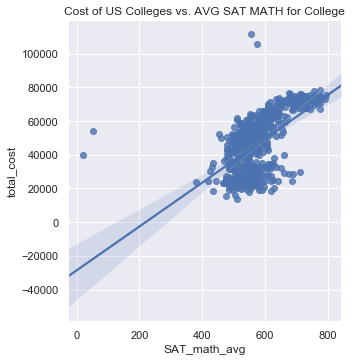

In [199]:
sns.lmplot('SAT_math_avg','total_cost',data=SAT_COST_PAY_df)
sns.set(rc={'figure.figsize':(50,15)})
ax = plt.gca()
ax.set_title("Cost of US Colleges vs. AVG SAT MATH for College")


In [183]:
# MATH_SALARY = pd.DataFrame(SAT_COST_PAY_df.groupby(['SAT_math_avg'])['early_car_pay'].agg(['count', 'mean',np.std]))
# EBRW_SALARY = pd.DataFrame(SAT_COST_PAY_df.groupby(['SAT_EBRW_avg'])['early_car_pay'].agg(['count', 'mean',np.std]))
# EBRW_SALARY.head()

,count,mean,std
SAT_EBRW_avg,,,
18,1,47800.0,NaN
26,1,50800.0,NaN
127,1,49100.0,NaN
377,1,41600.0,NaN
400,1,43500.0,NaN


In [186]:
MATH_SALARY = pd.DataFrame(SAT_COST_PAY_df[['SAT_math_avg','early_car_pay']])
EBRW_SALARY = pd.DataFrame(SAT_COST_PAY_df[['EBRW_math_avg','early_car_pay']])
MATH_SALARY.head()

,SAT_math_avg,early_car_pay
0,558.0,49700.0
1,480.0,44400.0
2,590.0,53700.0
3,580.0,46000.0
4,465.0,39800.0


In [ ]:
x = range(100)
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
early_cars = colleges_df['early_car_pay']
mid_cars = colleges_df['mid_car_pay']

ax1.hist(x=[float(car) for car in early_cars if car != None ], color='orange', alpha=0.5, label='early career pay', bins=30)
ax1.hist(x=[float(car) for car in mid_cars if car != None ], color='blue', alpha=0.5, label='mid career pay', bins=30)

plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('salaries')
plt.title('Distribution of Early and Mid Career Salaries')
plt.rc('font', size=20);
plt.show()